In [4]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [5]:
pd.options.display.max_rows
pd.options.display.max_rows = 70
pd.options.display.max_rows

70

In [15]:
ch89dg = pd.read_csv('./cleaned_data/CH89DG.csv')
ch89m = pd.read_csv('./cleaned_data/ch89m.csv')
ch89pru = pd.read_csv('./cleaned_data/ch89pru.csv')
ch89q = pd.read_csv('./cleaned_data/ch89q.csv')

In [22]:
ch89q

,Unnamed: 0,county,sex,xiang,q001,q002,q003,q004,q005,q006,...,q238,q239,q240,q241,q242,q243,q244,q245,q246,q247
0,0,AA,M,1,NaN,NaN,NaN,NaN,3.3,0.0,...,NaN,NaN,NaN,NaN,33.8,1.13,1.42,1.05,16.6,1.03
1,1,AA,M,2,NaN,NaN,NaN,NaN,3.3,0.0,...,NaN,NaN,NaN,NaN,29.6,1.09,1.36,1.05,15.7,0.99
2,2,AA,M,3,NaN,NaN,NaN,NaN,3.3,0.0,...,NaN,NaN,NaN,NaN,31.7,1.11,1.39,1.05,16.2,1.01
3,3,AA,F,1,NaN,NaN,NaN,NaN,10.0,0.0,...,11.5,92.3,88.5,3.8,31.8,1.08,1.41,1.04,15.9,0.99
4,4,AA,F,2,NaN,NaN,NaN,NaN,12.5,0.0,...,12.0,88.0,80.0,6.0,28.5,1.04,1.34,1.03,15.4,0.98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,616,YA,F,2,NaN,NaN,NaN,NaN,16.7,0.0,...,0.6,99.3,18.8,1.3,NaN,NaN,NaN,NaN,NaN,NaN
617,617,YA,F,3,NaN,NaN,NaN,NaN,13.3,0.0,...,6.5,97.2,25.7,3.1,30.5,1.03,1.31,0.97,17.6,1.09
618,618,YA,T,1,1.89,6.0,0.5,315.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
619,619,YA,T,2,1.40,7.0,0.4,201.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df = ch89dg.drop(columns='Unnamed: 0').copy()

In [24]:
df

,county,sex,xiang,d001,d002,d003,d004,d005,d006,d007,...,d157,d158,d159,d160,d161,g001,g002,g003,g004,g005
0,AA,T,1,2678.0,87.2,65.8,397.0,29.8,9.9,2.7,...,0.519,0.011,0.017,0.013,0.052,NaN,NaN,NaN,NaN,NaN
1,AA,T,2,2637.0,69.8,65.0,432.0,23.2,9.8,2.4,...,0.466,0.021,0.027,0.017,0.024,NaN,NaN,NaN,NaN,NaN
2,AA,T,3,2658.0,78.5,65.4,415.0,26.5,9.9,2.6,...,0.493,0.016,0.022,0.015,0.038,31.1,121.4,50.0,1.0,4.0
3,AB,T,1,2633.0,64.8,64.7,440.0,21.9,10.0,1.9,...,0.397,0.013,0.013,0.014,0.043,NaN,NaN,NaN,NaN,NaN
4,AB,T,2,2788.0,65.1,67.2,479.0,20.9,9.7,1.9,...,0.413,0.024,0.026,0.005,0.014,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,XB,T,2,2472.0,20.9,66.0,505.0,7.6,10.7,0.0,...,0.377,0.001,0.001,0.001,0.001,NaN,NaN,NaN,NaN,NaN
202,XB,T,3,2862.0,23.9,76.5,586.0,7.6,10.7,0.0,...,0.379,0.001,0.001,0.001,0.001,35.6,106.1,1750.0,3.0,3.0
203,YA,T,1,2111.0,61.0,70.6,318.0,25.9,13.4,4.9,...,3.249,0.001,0.002,0.001,0.043,NaN,NaN,NaN,NaN,NaN
204,YA,T,2,1872.0,45.5,63.7,300.0,22.0,13.9,4.7,...,0.778,0.001,0.002,0.001,0.044,NaN,NaN,NaN,NaN,NaN


In [25]:
df.columns

Index(['county', 'sex', 'xiang', 'd001', 'd002', 'd003', 'd004', 'd005',
       'd006', 'd007',
       ...
       'd157', 'd158', 'd159', 'd160', 'd161', 'g001', 'g002', 'g003', 'g004',
       'g005'],
      dtype='object', length=169)

In [26]:
df['county'].fillna('NA', inplace=True)

In [27]:
# diet survey CALORIC INTAKE (kcal/day/reference man)
df[df['xiang']==3].d001.describe()

count      69.000000
mean     2406.492754
std       324.448429
min      1579.000000
25%      2198.000000
50%      2433.000000
75%      2605.000000
max      3066.000000
Name: d001, dtype: float64

In [23]:
# diet survey TOTAL PROTEIN INTAKE (g/day/reference man)
df[df['xiang']==3].d003.describe()

count    69.000000
mean     59.081159
std       8.879144
min      40.700000
25%      52.400000
50%      58.100000
75%      65.400000
max      82.800000
Name: d003, dtype: float64

In [27]:
df[df['xiang']==3].loc[:,'d005':'d009'].describe()
# percentage caloric intake from
#     fat -- protein -- animal protein -- plant protein -- carbohydrate

,d005,d006,d007,d008,d009
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,18.278261,9.947826,1.265217,8.691304,71.253623
std,5.832487,1.439425,1.349273,1.613248,6.183364
min,7.400000,6.600000,0.000000,5.700000,55.900000
25%,13.700000,9.000000,0.300000,7.300000,66.600000
50%,18.400000,10.000000,0.900000,8.500000,72.600000
75%,22.000000,11.000000,1.700000,9.900000,76.200000
max,32.600000,13.700000,5.800000,13.000000,82.200000


In [28]:
df[df['xiang']==3].loc[:,'d012':'d016'].describe()
# mg/day/person intake of vitamins
#        vit A  --   vit E --  vit C --  vit B1 -- vit B2

,d012,d013,d014,d015,d016
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,682.347826,25.613043,120.240580,1.918841,0.726087
std,410.514413,10.542113,54.320804,0.668025,0.155915
min,77.000000,5.100000,28.900000,0.900000,0.400000
25%,420.000000,17.500000,82.900000,1.400000,0.600000
50%,594.000000,25.400000,111.400000,2.000000,0.700000
75%,848.000000,34.600000,157.700000,2.400000,0.800000
max,2009.000000,53.600000,344.900000,3.700000,1.200000


In [30]:
df[df['xiang']==3].loc[:,'d028':'d036'].describe()
# intake from 
#      pl food -- anl food -- tot food -- % pl fd - % anl fd - pl pt -- anl pt -- % pl pt -- % anl pt

,d028,d029,d030,d031,d032,d033,d034,d035,d036
count,69.000000,69.000000,69.00000,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1082.579710,77.308696,1159.84058,92.975362,7.042029,51.539130,7.556522,87.788406,12.253623
std,214.691188,74.382467,190.46133,6.880950,6.886803,11.410357,7.487627,11.979425,11.979229
min,669.000000,0.000000,825.00000,73.000000,0.000000,28.800000,0.000000,52.500000,0.000000
25%,916.000000,25.600000,1006.00000,88.600000,2.000000,41.800000,1.600000,81.000000,3.200000
50%,1055.000000,54.000000,1151.00000,95.400000,4.700000,52.100000,5.400000,91.400000,8.600000
75%,1217.000000,117.000000,1271.00000,98.000000,11.400000,58.500000,9.900000,96.800000,19.100000
max,1656.000000,367.600000,1684.00000,100.000000,27.100000,79.300000,29.400000,100.000000,47.500000


In [32]:
df[df['xiang']==3].loc[:,'d037':'d040'].describe()
# different carbs (g/day/person)
#        rice   --  wheat  --  cereal  -- starch

,d037,d038,d039,d040
count,69.000000,69.000000,69.000000,69.000000
mean,299.120290,168.391304,51.584058,147.772464
std,215.197818,214.614754,99.089291,172.160451
min,0.000000,0.000000,0.000000,0.000000
25%,21.400000,8.700000,0.000000,34.600000
50%,382.800000,37.600000,0.800000,90.300000
75%,477.200000,335.800000,61.000000,185.400000
max,599.500000,676.300000,492.300000,788.500000


In [35]:
df[df['xiang']==3].loc[:,'d041':'d046'].describe()
# plant food items (g/day/person)
#   legume -- light col veg -- grn veg - dry/pickl veg - fruit - nut

,d041,d042,d043,d044,d045,d046
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,21.389855,160.020290,148.798551,21.494203,14.273913,2.279710
std,22.722392,118.277982,95.226943,27.175275,33.632668,6.899138
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.300000,65.700000,71.000000,2.900000,0.000000,0.000000
50%,15.300000,136.900000,135.100000,14.300000,0.700000,0.100000
75%,32.400000,215.500000,221.200000,26.100000,9.900000,1.400000
max,104.600000,510.600000,434.900000,151.500000,197.800000,52.400000


In [37]:
df[df['xiang']==3].loc[:,'d047':'d052'].describe()
# animal product intake (g/day/person)
#        milk --   eggs   -- all meat -- red meat - poultry -- fish

,d047,d048,d049,d050,d051,d052
count,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,7.966667,4.204348,32.881159,29.334783,3.546377,25.665217
std,39.912178,4.649049,25.174475,23.687610,4.376998,40.981771
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.400000,14.000000,12.800000,0.000000,0.000000
50%,0.000000,2.600000,32.900000,25.800000,2.300000,6.100000
75%,0.000000,7.700000,47.600000,43.000000,5.900000,29.900000
max,292.200000,18.000000,104.400000,104.400000,17.500000,184.700000


In [39]:
# geography
df[df['xiang']==3].loc[:,'g001':'g005'].describe()
#       lat   --   long   --    elev  --   arid  --   heat

,g001,g002,g003,g004,g005
count,69.000000,69.000000,69.000000,69.000000,69.000000
mean,31.689855,112.639130,413.768116,1.623188,4.014493
std,6.299256,8.573973,527.803025,0.971679,1.265989
min,21.500000,82.800000,0.000000,1.000000,2.000000
25%,26.500000,108.600000,50.000000,1.000000,3.000000
50%,31.200000,113.300000,100.000000,1.000000,4.000000
75%,36.000000,118.800000,750.000000,3.000000,5.000000
max,46.300000,132.200000,2500.000000,4.000000,7.000000


array([[<AxesSubplot:title={'center':'d047'}>,
        <AxesSubplot:title={'center':'d048'}>],
       [<AxesSubplot:title={'center':'d049'}>,
        <AxesSubplot:title={'center':'d050'}>],
       [<AxesSubplot:title={'center':'d051'}>,
        <AxesSubplot:title={'center':'d052'}>]], dtype=object)

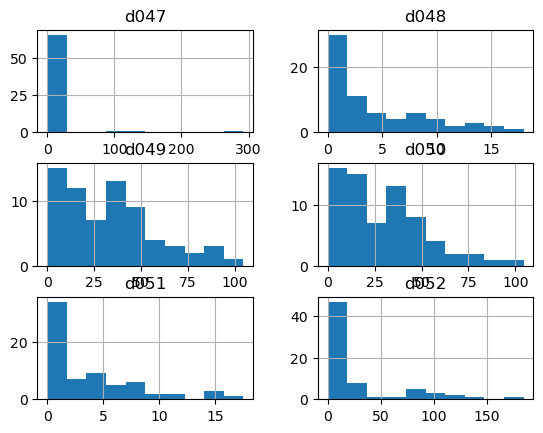

In [36]:
df[df['xiang']==3].loc[:,'d047':'d052'].hist()

In [2]:
dg_to_keep = ['d005','d006','d007','d008','d009', 
              'd012','d013','d014','d015','d016', 
              'd028','d029','d030','d031','d032','d033','d034','d035','d036', 
              'd037','d038','d039','d040', 
              'd041','d042','d043','d044','d045','d046', 
              'd047','d048','d049','d050','d051','d052', 
              'g001','g002','g003','g004','g005']

---
### P2: merge all 3 dataframes

In [28]:
diet = df.copy()
mortality = ch89m.drop(columns='Unnamed: 0').copy()
ques = ch89q.drop(columns='Unnamed: 0').copy()

In [29]:
diet.shape, mortality.shape, ques.shape

((206, 169), (201, 122), (621, 250))

In [36]:
diet.county.value_counts(ascending=True)[:5]

JB    2
AA    3
ND    3
OA    3
OB    3
Name: county, dtype: int64

In [34]:
diet[diet.county=='JB']

,county,sex,xiang,d001,d002,d003,d004,d005,d006,d007,...,d157,d158,d159,d160,d161,g001,g002,g003,g004,g005
72,JB,T,1,2594.0,53.3,67.5,460.0,18.5,10.4,0.5,...,0.226,0.002,0.009,0.001,0.002,NaN,NaN,NaN,NaN,NaN
73,JB,T,3,2594.0,53.3,67.5,460.0,18.5,10.4,0.5,...,0.226,0.002,0.009,0.001,0.002,30.6,116.6,50.0,1.0,4.0


In [51]:
first = diet.merge(mortality, how='left', on=['county','sex','xiang'])

In [52]:
data = ques.merge(first, how='left', on=['county','sex','xiang'])

In [60]:
data[(data.sex=='T') & (data.xiang==3)]

,county,sex,xiang,q001,q002,q003,q004,q005,q006,q007,...,m110,m111,m112,m113,m114,m115,m116,m117,m118,m119
8,AA,T,3,19.7,11.0,5.4,1748.0,7.3,0.0,4.2,...,3.26,0.39,1.24,6.99,2.25,2.02,0.54,0.00,0.00,3.09
17,AB,T,3,24.1,17.0,6.7,1435.0,8.3,0.0,4.4,...,3.50,0.60,1.97,7.96,3.81,0.51,1.03,0.00,0.00,2.88
26,AC,T,3,21.3,16.0,5.9,1431.0,2.5,0.8,4.3,...,3.79,0.95,1.08,7.58,2.80,1.71,0.86,0.00,0.00,2.06
35,BA,T,3,20.7,13.0,4.6,1867.0,7.4,0.8,4.9,...,1.52,0.00,1.22,5.03,0.52,2.13,0.00,0.00,0.00,0.52
44,BB,T,3,13.4,18.0,3.5,688.0,4.1,1.6,3.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53,BC,T,3,20.8,22.0,5.5,965.0,12.1,2.8,4.2,...,3.46,0.29,2.22,3.86,0.79,0.84,1.24,0.00,0.05,0.49
62,CB,T,3,12.0,16.0,3.1,833.0,2.5,0.8,4.0,...,1.10,0.00,1.02,3.32,0.00,0.25,0.09,0.00,0.09,0.59
71,CC,T,3,14.5,24.0,3.6,620.0,22.5,0.8,4.7,...,2.17,0.23,1.48,0.86,0.15,0.07,0.16,0.00,0.00,0.15
80,CD,T,3,44.4,11.0,11.6,4339.0,3.4,1.7,4.6,...,2.34,0.72,1.28,3.69,1.34,1.23,0.45,0.00,0.00,0.28
89,DA,T,3,46.3,68.0,10.7,934.0,0.8,0.0,4.7,...,1.51,0.21,0.97,6.40,0.38,0.98,2.76,0.43,0.05,0.27


In [61]:
data['county'].fillna('NA', inplace=True)

In [74]:
practice = data[(data.sex=='T') & (data.xiang==3)][['county','sex','xiang','m001','m002','m003','m004','m005','m006']].copy()

In [75]:
practice.melt(id_vars=['county','sex','xiang'])

,county,sex,xiang,variable,value
0,AA,T,3,m001,3.61
1,AB,T,3,m001,3.64
2,AC,T,3,m001,3.63
3,BA,T,3,m001,3.51
4,BB,T,3,m001,NaN
...,...,...,...,...,...
409,WB,T,3,m006,76.63
410,WC,T,3,m006,70.33
411,XA,T,3,m006,139.52
412,XB,T,3,m006,140.51
